In [60]:
# Here in version 4.1, I use gradient descent
# to optimize static images -- 
# Ideally I'd mess with the transparencies, but
# this is a good starting point, hence the .1 in the version number

In [61]:
import numpy as np
import glob
from   PIL import Image, ImageOps
import matplotlib.pyplot as plt
import random

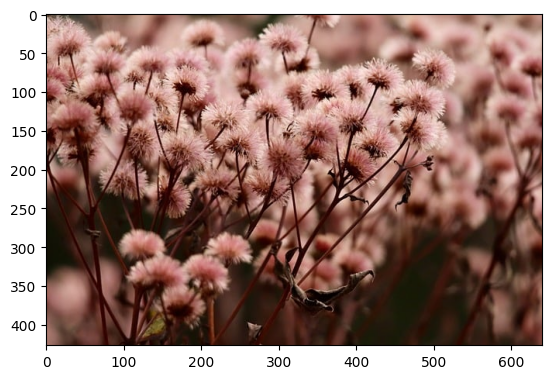

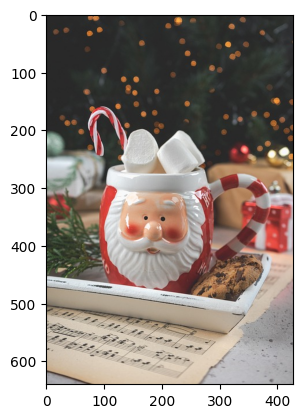

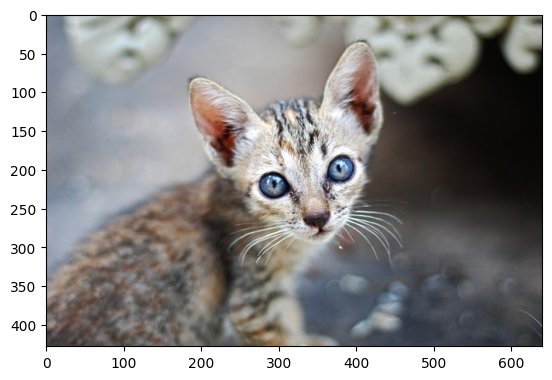

In [62]:
images = []

for filename in glob.glob('demo images/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = np.array(im).astype(np.float32) / 255
    images.append(im)

    plt.imshow(im)
    plt.show()

In [63]:
def get_noisy_images(image, num_components, gradient_steps = 10, gradient_size = .1):
    """Image should be of the format
    (height, width, channels), and be 
    filled with floats between 0 and 1.
    
    Returns a list of static images"""
    
    # Start with pure random noise
    results = np.array([np.clip(np.random.uniform(-5, 6, image.shape), 0, 1) for i in range(num_components)])


    for i in range(gradient_steps):
        average = np.average(results, axis = 0)
        # how changing each channel changes the similarity
        difference = image - average
        print(np.sum(difference) / np.prod(image.shape))

        # figure this out later...
        for j, result in enumerate(results):
            results[j] = np.maximum(0, np.minimum(1, result + (difference * gradient_size) / num_components))

    return results



-0.043114345125239845
-0.04078300021613441
-0.038594742488485115
-0.03653936764603022
-0.034607478725425
-0.03279029949295606
-0.031080453205285224
-0.029470768152930954
-0.027954667706511487
-0.026525871686382815
-0.025178442711308664
-0.02390701058252554
-0.022706892415850777
-0.02157390176337675
-0.020503639063526733
-0.019492068529456667
-0.018535800760506177
-0.017631498989220694
-0.01677583062865827
-0.01596579375809108
-0.015198580027630623
-0.014471843131778907
-0.013783203522140696
-0.013130362455143494
-0.012511294391844006
-0.01192399329961694
-0.011366715568742572
-0.010837728760732883
-0.010335419874946322
-0.00985831827595897


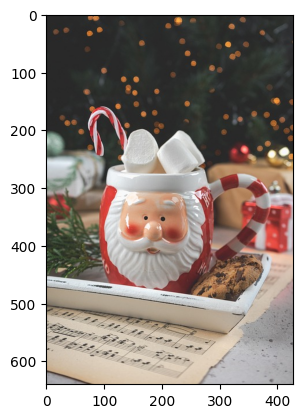

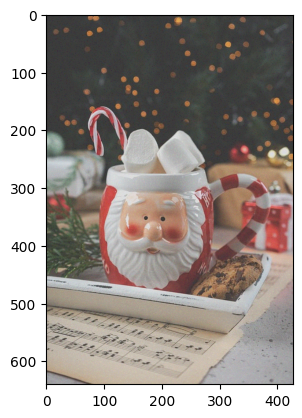

Difference between original and reconstructed image: -7710.64605642589


In [64]:
original_image = random.choice(images)
results = get_noisy_images(original_image, 10, 30, .9)
reconstructed_image = np.average(results, axis = 0)

plt.imshow(original_image)
plt.show()
plt.imshow(reconstructed_image)
plt.show()

print("Difference between original and reconstructed image:", np.sum(original_image - reconstructed_image))


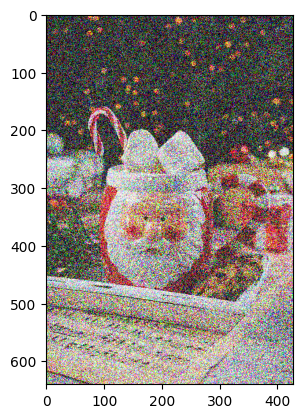

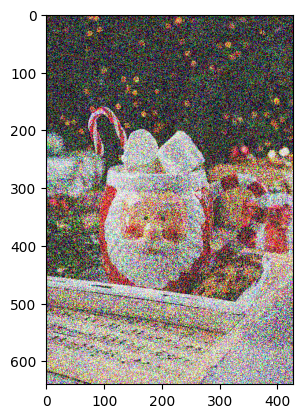

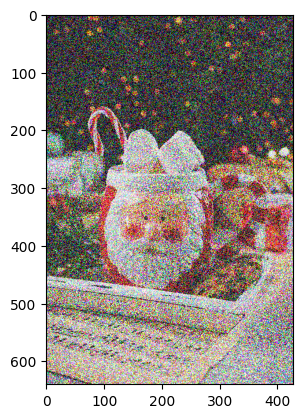

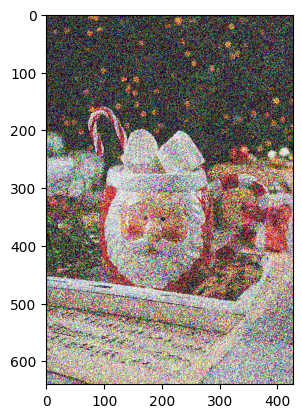

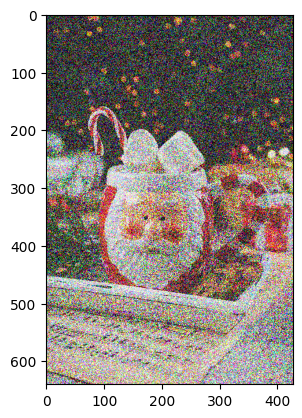

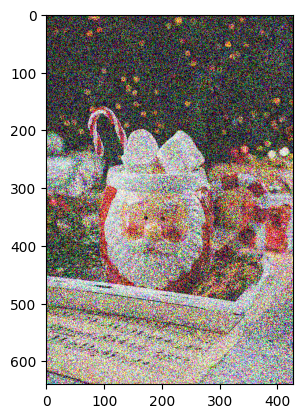

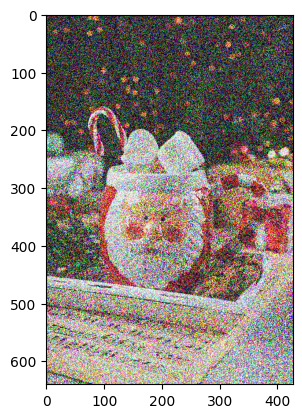

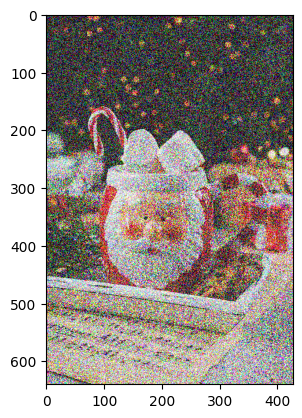

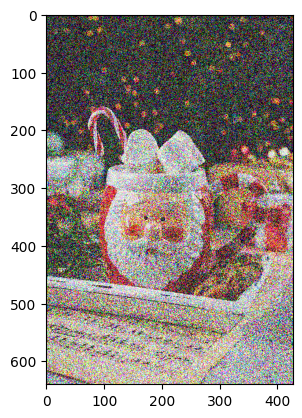

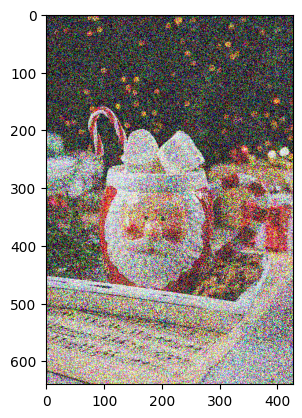

In [65]:
for result in results:
    plt.imshow(result)
    plt.show()